## 2.小麦とチェス盤問題
8×8マスのチェス盤の上に、小麦の粒を1, 2, 4と順番に置いていくと最終的な小麦の数はどのようになるかという問題です。

In [236]:
import numpy as np
import matplotlib.pyplot as plt

In [237]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]
4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


## 【問題1】2×2マスのチェス盤の小麦の数
2×2マスのチェス盤をndarrayによって表現し、各マスの小麦の数を計算してください。左上のマスに小麦を1つ置いた後、その右が2つ、左下が4つ、右下が8つという風に進みます。


サンプルコードで作成したndarrayのshapeの変形を行ってください。

In [238]:
print(small_board_ndarray.reshape(2,2))

[[1 2]
 [4 8]]


##【問題2】n×mマスへの拡張
n×mマスのチェス盤の小麦の数を記したndarrayを返す関数を作成してください。そして、この関数を使い8×8マスのチェス盤の小麦の数を求めてください。

In [239]:
def ndarray_reshaper(n, m):
  n_squares = n * m
  board_list = [1]
  for _ in range(n_squares - 1):
    board_list.append(2*board_list[-1])
#  print("{}マスの板に小麦を並べる（リスト）：{}".format(n*m, board_list))
  board_ndarray = np.array(board_list)
  return board_ndarray, board_ndarray.reshape(n,m)

In [240]:
array8x8_1d, array8x8 = ndarray_reshaper(8,8)
print(array8x8)

[[1.e+00 2.e+00 4.e+00 8.e+00 2.e+01 3.e+01 6.e+01 1.e+02]
 [3.e+02 5.e+02 1.e+03 2.e+03 4.e+03 8.e+03 2.e+04 3.e+04]
 [7.e+04 1.e+05 3.e+05 5.e+05 1.e+06 2.e+06 4.e+06 8.e+06]
 [2.e+07 3.e+07 7.e+07 1.e+08 3.e+08 5.e+08 1.e+09 2.e+09]
 [4.e+09 9.e+09 2.e+10 3.e+10 7.e+10 1.e+11 3.e+11 5.e+11]
 [1.e+12 2.e+12 4.e+12 9.e+12 2.e+13 4.e+13 7.e+13 1.e+14]
 [3.e+14 6.e+14 1.e+15 2.e+15 5.e+15 9.e+15 2.e+16 4.e+16]
 [7.e+16 1.e+17 3.e+17 6.e+17 1.e+18 2.e+18 5.e+18 9.e+18]]


##【問題3】小麦の数の合計
8×8マスのチェス盤の小麦の数の合計を求めてください。また、各列の平均を求め、それを棒グラフで可視化してください。


棒グラフはサンプルコードを用意しています。

8×8マスのチェス盤の小麦の数の合計：1.8446744073709552e+19個
[9.e+15 2.e+16 4.e+16 7.e+16 1.e+17 3.e+17 6.e+17 1.e+18]


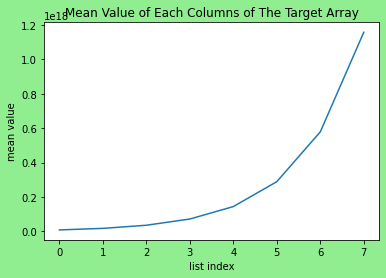

In [241]:
total_wheat_num = np.sum(array8x8)
print("8×8マスのチェス盤の小麦の数の合計：{}個".format(total_wheat_num))

"""
引数axisに0を渡すと列ごと、1を渡すと行ごと。（本当は０：１次元、１：２次元の意味。）
https://deepage.net/features/numpy-axis.html
"""
np.sum(array8x8, axis=0)
print(np.mean(array8x8, axis=0))

fig1 = plt.figure(facecolor="lightgreen")
plt.title("Mean Value of Each Columns of The Target Array")
plt.xlabel("list index")
plt.ylabel("mean value")
plt.plot(np.mean(array8x8, axis=0))
plt.show()


## 【問題4】小麦の数のヒートマップ
8×8マスのチェス盤の小麦の数をヒートマップとして可視化してください。


ヒートマップはサンプルコードを用意しています。


《ヒートマップのサンプルコード》


4行2列の配列のヒートマップです。値が小さいところが紫、大きいところが黄色になっています

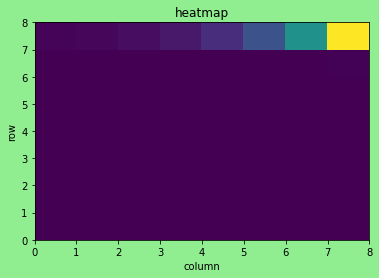

In [242]:
fig2 = plt.figure(facecolor="lightgreen")
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(array8x8)
plt.show()

##【問題5】後半は前半の何倍か
チェス盤の後半にある小麦の数は前半にある小麦の数の何倍かを求めてください。前半とは配列の0から3行目、後半は4から7行目です。

In [243]:
first_half = []
second_half = []

for i in range(8):
  if i<=3:
    first_half.append(np.uint64(np.sum(array8x8, axis=0)[i])) # 0~3行目までの行の和をリスト化
  else:
    second_half.append(np.uint64(np.sum(array8x8, axis=0)[i])) # 4~7行目までの行の和をリスト化

print("チェス盤の後半にある小麦の数は前半にある小麦の数の{}倍".format(sum(second_half) / sum(first_half)))

チェス盤の後半にある小麦の数は前半にある小麦の数の16.0倍


##【問題6】他の計算方法によるn×mマスへの拡張
問題2と同様の「n×mマスのチェス盤の小麦の数を記したndarrayを返す関数」を、np.append()を使ったものと、ブロードキャストを使ったもので新たに作成してください。


それらの関数を使い8×8マスのチェス盤の小麦の数を再び求めてください。

In [244]:
def ndarray_reshaper_npappend(n, m):
  n_squares = n * m
  board_ndarray = np.array([1])
  for _ in range(n_squares - 1):
    board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])
  return np.uint64(board_ndarray), np.uint64(board_ndarray.reshape(n,m))

In [245]:
def ndarray_reshaper_broadcast(n, m):
  n_squares = n * m
  indices_of_squares = np.arange(n_squares) # 0~63のndarrayを作成
  board_ndarray = 2**indices_of_squares
  return np.uint64(board_ndarray), np.uint64(board_ndarray.reshape(n,m))

In [246]:
array8x8_1d_npappend, array8x8_npappend = ndarray_reshaper_npappend(8,8)
print(array8x8_npappend)

[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in long_scalars
  """


In [247]:
array8x8_1d_broadcast, array8x8_broadcast = ndarray_reshaper_broadcast(8,8)
print(array8x8_broadcast)

[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

## 【問題7】計算時間の比較
3種類の方法を見てきました。それぞれの計算時間をJupyter Notebookの%%timeitを用いて計測し、比較と考察を行ってください。


%%timeitはセル内のコードを複数回実行し、その平均実行時間を出力する働きをします。

In [251]:
# appendのユーザ関数
%%timeit
array8x8_1d, array8x8 = ndarray_reshaper(8,8)

The slowest run took 8.21 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 15.3 µs per loop


In [252]:
# np.appendのユーザ関数
%%timeit
array8x8_1d_npappend, array8x8_npappend = ndarray_reshaper_npappend(8,8)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in long_scalars
  """


1000 loops, best of 3: 425 µs per loop


In [253]:
# broadcastのユーザ関数
%%timeit
array8x8_1d_broadcast, array8x8_broadcast = ndarray_reshaper_broadcast(8,8)

The slowest run took 18.33 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.69 µs per loop


###考察
jupyter notebookのマジックコマンド`%%timeit`を用いて`append`, `np.append`, `broadcast`を使用したユーザ関数の処理時間の計測を行った。
それぞれの平均処理時間は次の通りであった。
- `append` : 15.3 µs
- `np.append` : 425 µs
- `broadcast` : 4.69 µs

結果より、`np.append`の処理が最速の`broadcast`の処理より１００倍近く遅いことがわかった。そこで、`np.append`の記法に着目すると、ndarrayに新しい値を追加する時に、`append`のように新しい値をndarrayの最後に追加するだけでなく、追加した後に、新しいndarrayを元のndarrayに代入して更新していることがわかる。従い処理が遅くなったと考える、
また、結果より`for`ループより`broadcast`の処理の方が早いことがわかった。